## Linear Regression with Multiple Variables

### Import Libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Load data

In [2]:
# Load data from CSV file
# - column 1: house size in feet**2 (x1)
# - column 2: number of bedrooms (x2)
# - column 3: house price (y)
data = np.loadtxt('data/LinearRegressionMultiple.csv', delimiter=',')

In [3]:
# Separate features (x1, x2) from target (y)
X, y = np.hsplit(data, np.array([2]))

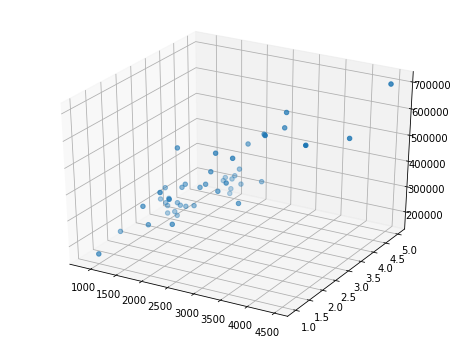

In [4]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(X[:,0], X[:,1], y)

### Apply Linear Regression

In [5]:
# Pipeline components
scaler = StandardScaler()
regr = LinearRegression()

# Pipeline of feature scaler and linear regressor
model = Pipeline([('scaler', scaler), ('regr', regr)])

# Run linear regression on scaled features
model.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

### Predictions

In [6]:
# Create a grid from feature min and max values
grid_range = np.vstack([X.min(axis=0), X.max(axis=0)])
grid = np.meshgrid(grid_range[:,0], grid_range[:,1])

# Compute predictions from grid values
X_grid = np.c_[grid[0].ravel(), grid[1].ravel()]
y_grid = model.predict(X_grid).reshape(grid[0].shape)

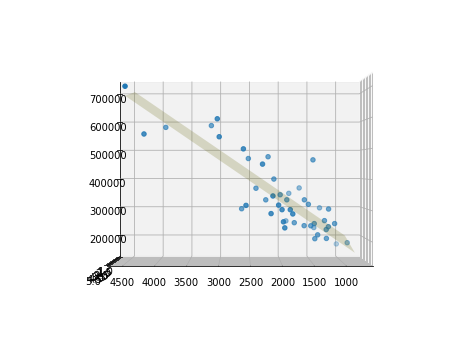

In [7]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(0, 90)
ax.scatter3D(X[:,0], X[:,1], y)
ax.plot_surface(grid[0], grid[1], y_grid, color='y', alpha=0.2)

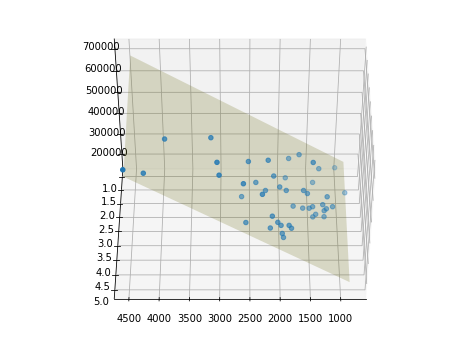

In [8]:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 90)
ax.scatter3D(X[:,0], X[:,1], y)
ax.plot_surface(grid[0], grid[1], y_grid, color='y', alpha=0.2)

In [9]:
# Training mean squared error
np.mean((model.predict(X) - y) ** 2)

4086560101.205656